In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from plotnine import *
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')


In [4]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [6]:
def missing_data(data, thresh=1, color='black', edgecolor='black', width=15, height=3):
     
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False)[:10].plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull()[:10].sum()/len(data))/15, thresh +8, 
             f'Columns with more than {thresh}% missing values', fontsize=12, color='darkblue',
             ha='left' ,va='top')
    plt.text(len(data.isnull()[:10].sum()/len(data))/15, thresh -3, 
             f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
             ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    
    return plt.show()

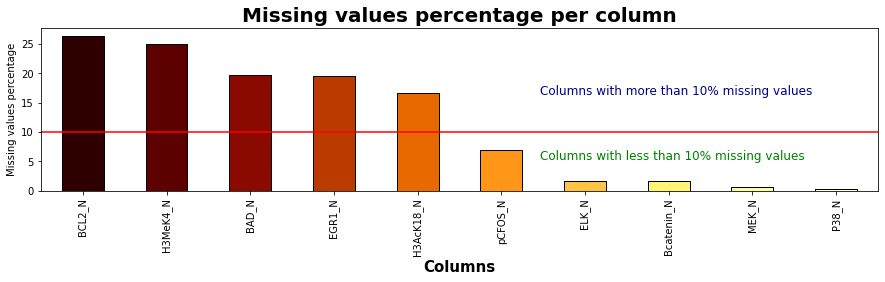

In [7]:
missing_data(df, 10, color=sns.color_palette('afmhot',10))

Dropping columns with more than 10% missing data:

In [8]:
df.shape

(1080, 82)

In [9]:
df1 = df.dropna(how='any',axis=1,thresh=df.shape[0]*0.9)

In [10]:
df1.shape

(1080, 77)

In [11]:
df1.isnull().sum().sort_values(ascending=False)

pCFOS_N       75
ELK_N         18
Bcatenin_N    18
MEK_N          7
MTOR_N         3
              ..
ARC_N          0
ERBB4_N        0
nNOS_N         0
Tau_N          0
class          0
Length: 77, dtype: int64

In [12]:
df1['pCFOS_N'].describe()

count    1005.000000
mean        0.131053
std         0.023863
min         0.085419
25%         0.113506
50%         0.126523
75%         0.143652
max         0.256529
Name: pCFOS_N, dtype: float64

In [13]:
df1['ELK_N'].describe()

count    1062.000000
mean        1.173400
std         0.335786
min         0.497695
25%         0.944435
50%         1.096186
75%         1.323581
max         2.802948
Name: ELK_N, dtype: float64

In [14]:
df1['Bcatenin_N'].describe()

count    1062.000000
mean        2.146550
std         0.435742
min         1.134886
25%         1.826707
50%         2.114769
75%         2.423875
max         3.680552
Name: Bcatenin_N, dtype: float64

Replacing null values with mean.

In [15]:
df2 = df1.fillna(df1.mean())

In [16]:
df2.isnull().sum().sort_values(ascending=False)

MouseID     0
S6_N        0
nNOS_N      0
ERBB4_N     0
ARC_N       0
           ..
ERK_N       0
ELK_N       0
CREB_N      0
CAMKII_N    0
class       0
Length: 77, dtype: int64

Checking for duplicates:

In [17]:
duplicateRowsdf = df2[df2.duplicated()]
print(duplicateRowsdf)
1

Empty DataFrame
Columns: [MouseID, DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, pS6_N, pCFOS_N, SYP_N, CaNA_N, Genotype, Treatment, Behavior, class]
Index: []

[0 rows x 77 columns]


1

In [18]:
df2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.121521,0.131053,0.446073,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.014276,0.023018,0.066432,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.067254,0.085419,0.258626,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,1.375598,2.079338,0.142838,1.116262,0.793739,0.206395,0.110839,0.114373,0.398082,1.081423
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,1.522693,2.242197,0.157549,1.236586,0.849858,0.224000,0.121626,0.128466,0.448459,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,1.713087,2.420226,0.173303,1.363079,0.916173,0.241655,0.131955,0.142427,0.490773,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,2.586216,2.877873,0.257616,1.897202,1.204598,0.358289,0.158748,0.256529,0.759588,2.129791


In [19]:
df2.describe(include='object')

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


Dropping MouseID:

In [20]:
df2 = df2.drop('MouseID', axis=1)

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Text(0.5, 1.0, 'Distribution of Genotype')

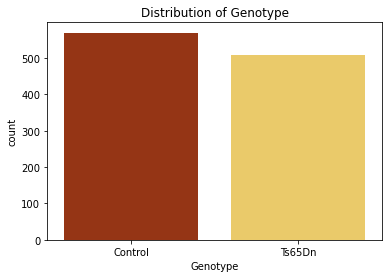

In [21]:
print(df2['Genotype'].value_counts())
ax = sns.countplot(x='Genotype',data=df2, palette='afmhot')
ax.set_title('Distribution of Genotype')

Memantine    570
Saline       510
Name: Treatment, dtype: int64


Text(0.5, 1.0, 'Distribution of Treatment')

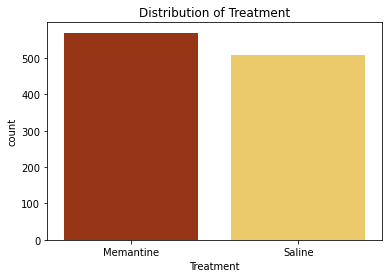

In [22]:
print(df2['Treatment'].value_counts())
ax = sns.countplot(x='Treatment',data=df2, palette='afmhot')
ax.set_title('Distribution of Treatment')

S/C    555
C/S    525
Name: Behavior, dtype: int64


Text(0.5, 1.0, 'Distribution of Behavior')

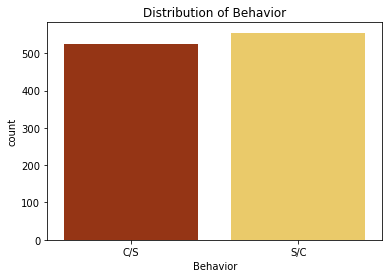

In [23]:
print(df2['Behavior'].value_counts())
ax = sns.countplot(x='Behavior',data=df2, palette='afmhot')
ax.set_title('Distribution of Behavior')

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


Text(0.5, 1.0, 'Distribution of Class')

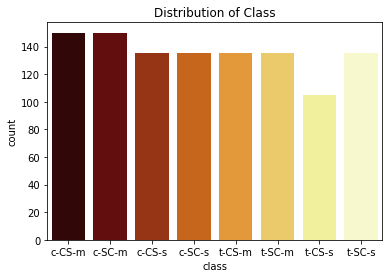

In [24]:
print(df2['class'].value_counts())
ax = sns.countplot(x='class',data=df2, palette='afmhot')
ax.set_title('Distribution of Class')

#### Spliting data into independent variables and target data:

In [25]:
X = df2.drop('class',axis=1)
y1 = df2[['class']]

#### Encoding

Now is the time to encode categorical data into numerical.

In [26]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}
y = y1.replace(classes)
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [27]:
y = pd.DataFrame(y)

In [28]:
y.reset_index()


,index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1075,1075,6
1076,1076,6
1077,1077,6
1078,1078,6


In [29]:
y.columns

Index(['class'], dtype='object')

In [30]:
y['class'].value_counts()

0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: class, dtype: int64

In [31]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1080 non-null   int64
dtypes: int64(1)
memory usage: 8.6 KB


In [32]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DYRK1A_N             1080 non-null   float64
 1   ITSN1_N              1080 non-null   float64
 2   BDNF_N               1080 non-null   float64
 3   NR1_N                1080 non-null   float64
 4   NR2A_N               1080 non-null   float64
 5   pAKT_N               1080 non-null   float64
 6   pBRAF_N              1080 non-null   float64
 7   pCAMKII_N            1080 non-null   float64
 8   pCREB_N              1080 non-null   float64
 9   pELK_N               1080 non-null   float64
 10  pERK_N               1080 non-null   float64
 11  pJNK_N               1080 non-null   float64
 12  PKCA_N               1080 non-null   float64
 13  pMEK_N               1080 non-null   float64
 14  pNR1_N               1080 non-null   float64
 15  pNR2A_N              1080 non-null   f

#### Scaling of the data:

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)

In [35]:
df_scaled = pd.DataFrame(df_scaled)

In [36]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.426816,0.133930,0.336299,0.705738,1.0,0.0,1.0,0.0,1.0,0.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.429952,0.110434,0.365208,0.749771,1.0,0.0,1.0,0.0,1.0,0.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.448652,0.121560,0.353621,0.868229,1.0,0.0,1.0,0.0,1.0,0.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.392700,0.151031,0.265619,0.721879,1.0,0.0,1.0,0.0,1.0,0.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.410187,0.147711,0.350381,0.812053,1.0,0.0,1.0,0.0,1.0,0.0


In [37]:
df_scaled.shape

(1080, 78)

# K-means Clustering

#### 1. Choose the number of clusters K - we will use Elbow method <br>


# Application of Elbow method to find best suitable number of clusters for our dataset

K-means Clustering: predictions are based on the number of centroids present (K) and nearest mean values, given an Euclidean Distance measurement between observations.

In [38]:
#! pip install yellowbrick

### Using Inertia and Silhouette Score to evaluate best K-means model

<b> Inertia </b> measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. <br>
A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet#:~:text=Inertia%20measures%20how%20well%20a,number%20of%20clusters%20(%20K%20).


The Silhouette Score is measure of Cohesion and Seperation of clusters. <br>
The <b> silhouette score </b> falls within range [-1,1] <br>
The silhouette score of 1 means that the clusters are very dense and nicely separated and have strong cohesion and seperation. The score o means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

Analysing Silhouette Score using Silhouette Visualizer method to decide how many clusters gives best score:

In [39]:
#! pip install sklearn.utils
#!pip install -U imbalanced-learn

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

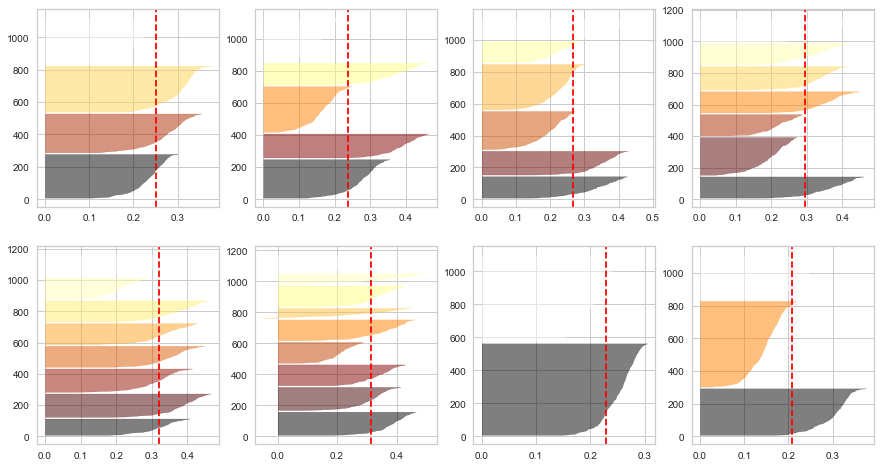

In [41]:
fig, ax = plt.subplots(2,4, figsize=(15,8))
for i in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 4)
    
    visualizer = SilhouetteVisualizer(km, colors='afmhot', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

Another way of checking best silhouette score:

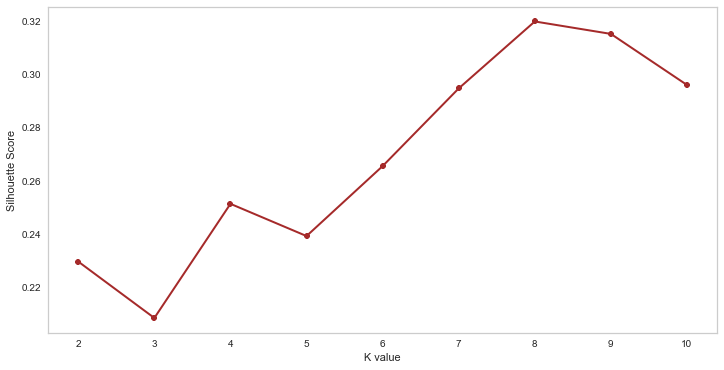

In [42]:
sil = []

for i in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(df_scaled)
    sil.append(silhouette_score(df_scaled, km.predict(df_scaled)))
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([2,3,4,5,6,7,8,9,10], sil, linewidth=2, color='brown', marker = '8')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.show()


Based on the above we can clearly see that the highest Silhouette Score we can get while running Kmeans clustering using 8 clusters.

Checking the same for Inertia:

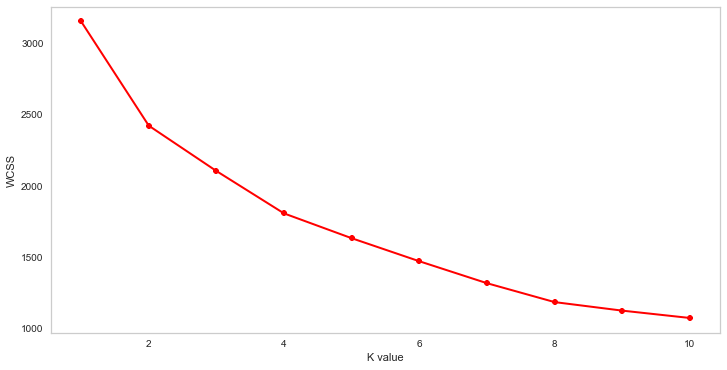

In [43]:
wcss=[]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

We can conclude that if we will take into consideration both Silhouette Score and Inertia(WCSS)thatbest number of clusters for our dataset is 8.

#### 2. Apply  K-means with 8 clusters to raw data 

In [44]:
kmeans_1 = KMeans(n_clusters=8, random_state=42)
kmeans_1 = kmeans_1.fit(df_scaled)
inertia_1 = kmeans_1.inertia_
print('The clusters are:  ', kmeans_1.labels_)
print('The Inertia is:   ', kmeans_1.inertia_ )


The clusters are:   [2 2 2 ... 7 7 7]
The Inertia is:    1182.580135026758


Inertia for two clusters on raw data is: <b> 1182.580135026758 </b>

In [45]:
#predictions for new data, with new clusters created
km_label_1 = kmeans_1.predict(df_scaled)

# calculating the Counts of the cluster
unique, counts1 = np.unique(km_label_1, return_counts=True)
counts1 = counts1.reshape(1,8)

# Creating a Data frame
countscldf_1 = pd.DataFrame(counts1, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])

#display
countscldf_1

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,150,150,135,135,135,135,135


In [46]:
silh_score_1 = silhouette_score(df_scaled, km_label_1)

# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(df_scaled, km_label_1)}')

Silhouette Score(n = 2): 0.31981543590845335


<b> Silhouette Score <b/> on raw data with 2 Clusters:  0.31981543590845335

### PCA

Dimensionality reduction algorithms capture
the salient information in the original data while reducing the size of the dataset. As we move from a high number of dimensions to a lower number, the noise in
the dataset is minimized because the dimensionality reduction algorithm needs to capture the most important aspects of the original data and
cannot devote attention to infrequently occurring elements. <br>

(hands on unsupervised learning using ptyhon)

The goal of PCA is to extract the most important information from the data table by compressing the size of the data and keeping only the important information. 

* The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia/variance of the data, hence the less principal components you have the lower the inertia will be after PCA.<br>
* For every new component, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components. <br>
* Inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be. <br>
* the rule of thumb is that 80% explained variance should be the criterium when choosing the number of principal components.

#### 3. Identifying the 'best' number of components for our DataSet (number of components that will explain 80% of variance of our data):

In [47]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

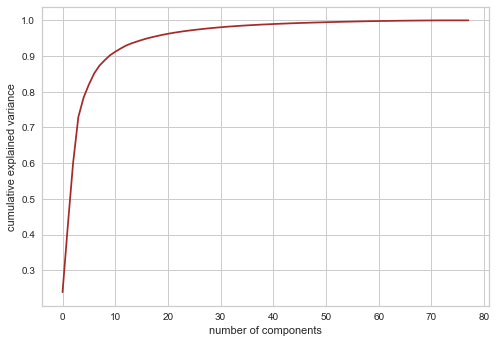

In [48]:
pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='brown') 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [49]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

6

In [50]:
pca = PCA(0.39).fit(df_scaled)
pca.n_components_ 

2

We have found out that to keep 80% of explained variance we should perform PCA with 6 components.

I we would decide to do PCA with two components only (that way it would be easy to visualise our data), we would be left with only 39% varaiance explained, we would loose lots of signal from our data.

#### 4. Apply K-means with 8 clusters on data after PCA  with 6 components

In [51]:
pca = PCA(n_components=6, random_state=42)
df_pca_1 = pca.fit(df_scaled).transform(df_scaled)

kmeans_2 = KMeans(n_clusters=8, random_state=42)
kmeans_2 = kmeans_2.fit(df_pca_1)
inertia_2 = kmeans_2.inertia_
print('The clusters are:  ', kmeans_2.labels_)
print('The Inertia is:   ', kmeans_2.inertia_ )

The clusters are:   [2 2 2 ... 6 6 6]
The Inertia is:    660.1422136422094


Inertia for two clusters on data after PCA with 8 components is: <b> 660.1422136422094 </b>

Inertia has improved slightly after applying PCA with 8 components.

In [52]:
#predictions for new data, with new clusters created
km_label_2 = kmeans_2.predict(df_pca_1)

silh_score_2 = silhouette_score(df_pca_1, km_label_2)
# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca_1, km_label_2)}')

Silhouette Score(n = 2): 0.44797732154015246


Silhouette Score for two clusters on data after PCA with 8 components is: <b> 0.44797732154015246 </b>

In [53]:
# calculating the Counts of the cluster
unique, counts2 = np.unique(km_label_2, return_counts=True)
counts2 = counts2.reshape(1,8)

# Creating a Data frame
countscldf_2 = pd.DataFrame(counts2, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])

#display
countscldf_2

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,150,150,135,135,135,135,135


#### 3. Apply K-means with 8 clusters on data after PCA with 2 components (understanding that only 39% of explained variance will be kept)

In [54]:
# initialising PCA model for two components
pca = PCA(n_components=2, random_state=42)
df_pca_2 = pca.fit(df_scaled).transform(df_scaled)

kmeans_3 = KMeans(n_clusters=8, random_state=42)
kmeans_3 = kmeans_2.fit(df_pca_2)
inertia_3 = kmeans_3.inertia_
print('The clusters are:  ', kmeans_3.labels_)
print('The Inertia is:   ', kmeans_3.inertia_ )


The clusters are:   [4 4 4 ... 3 3 3]
The Inertia is:    18.874801751372104


Inertia for two clusters on data after PCA with 2 components is: <b>  18.874801751372104 </b>

In [55]:
km_label_3 = kmeans_2.predict(df_pca_2)
silh_score_3 = silhouette_score(df_pca_2, km_label_3)

# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca_2, km_label_3)}')

Silhouette Score(n = 2): 0.7682209605821667


Silhouette Score for two clusters on data after PCA with 2 components is: <b> 0.7682209605821667 </b>

In [56]:
# calculating the Counts of the cluster
unique, counts3 = np.unique(km_label_3, return_counts=True)
counts3 = counts3.reshape(1,8)

# Creating a Data frame
countscldf_3 = pd.DataFrame(counts3, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])

#display
countscldf_3

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,135,135,135,150,150,135,135


Creating dataframe with new components and old and new lables;

In [57]:
df_pca_concat = pd.DataFrame(df_pca_2, columns =['Component 1', 'Component 2'])

In [58]:
df_pca_concat.head(2)

,Component 1,Component 2
0,-0.804618,-1.007160
1,-0.822809,-1.002333


In [59]:
columns = ['km_label_3']
km_label_3 = pd.DataFrame(data=km_label_3, columns=columns)
km_label_3.head()

,km_label_3
0,4
1,4
2,4
3,4
4,4


In [60]:
print(km_label_3.value_counts())

km_label_3
4             150
5             150
1             135
2             135
3             135
6             135
7             135
0             105
dtype: int64


Creating the entire dataset again, joining predicted label and original label:

In [61]:
df_pca_concat = pd.concat([df_pca_concat, km_label_3,y], axis=1)

In [62]:
df_pca_concat.head()

,Component 1,Component 2,km_label_3,class
0,-0.804618,-1.007160,4,0
1,-0.822809,-1.002333,4,0
2,-0.846543,-0.996492,4,0
3,-0.811094,-0.998073,4,0
4,-0.835360,-0.997919,4,0


#### 4. Visualize original data vs Clustered Data

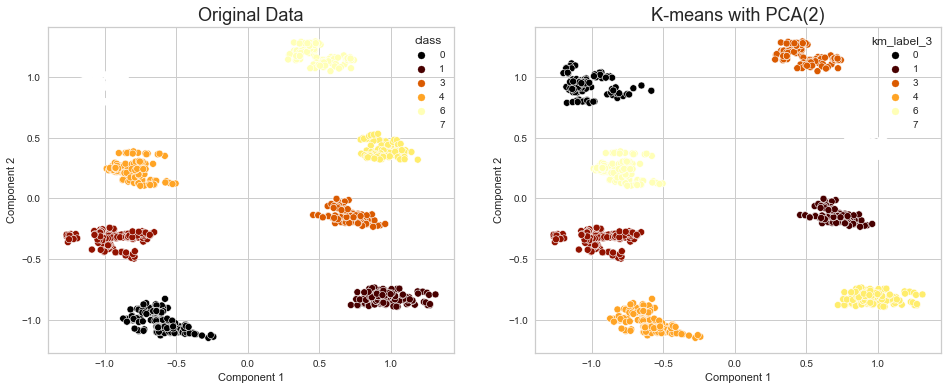

In [63]:
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_concat, hue = 'class', palette='afmhot')
plt.title('Original Data', fontsize=18)

plt.subplot(1,2,2)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_concat, hue = 'km_label_3', palette='afmhot')
plt.title('K-means with PCA(2)', fontsize=18)

plt.show()

### Model Comparison based on Inertia and Silhouette Score:

In [64]:
Model_Comparison = pd.DataFrame({
'Model' : ['K-means_1', 'K-means_PCA(6)', 'K-means_PCA(2)'],
'Inertia_Score' : [inertia_1, inertia_2, inertia_3],
'Silhouette_Score' : [silh_score_1, silh_score_2, silh_score_3]})

Model_Comparison_df = Model_Comparison.sort_values(by='Inertia_Score', ascending=True)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Inertia_Score,Silhouette_Score
0,K-means_PCA(2),18.874802,0.768221
1,K-means_PCA(6),660.142214,0.447977
2,K-means_1,1182.580135,0.319815


Text(0.5, 1.0, 'Model Comparison')

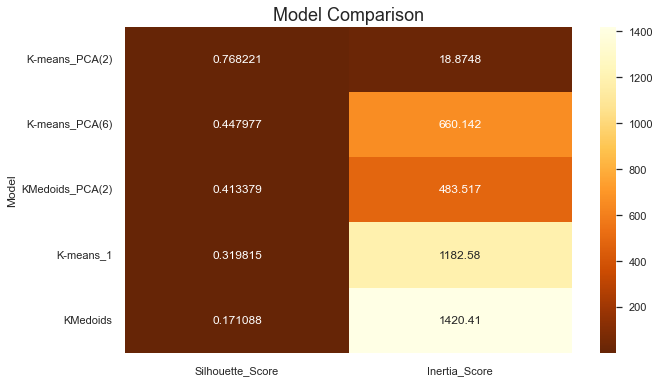

In [83]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True,fmt='g', cmap='YlOrBr_r')
plt.title('Model Comparison', fontsize=18)

#### Conclusion:
After running the Elbow method on WCSS and Silhouette score, we concluded that the best number of clusters are eight. <br>
After application of K-means on raw/unchanged data our results were poor: very high Inertia plus Silhouette Score very close to zero. <br>
Then we have applied PCA with 6 components after checking that this will remain 80% of variance explained. The results have improved a lot. <br>
The last step was to apply PCA with 2 components only, understanding that the two components hold only 39% of the variance explained. The Inertia and Silhouette Scores significantly improved this time.



### KMedoids 

In [66]:
#!pip install scikit-learn-extra

In [67]:
from sklearn_extra.cluster import KMedoids

Generating KMedoids classifier with 8 clusters:

In [68]:
Medoids_1 = KMedoids(n_clusters=8, random_state=0)

Applying classifier to original/raw data:

In [69]:
Medoids_1 = Medoids_1.fit(df_scaled)
inertia_4 = Medoids_1.inertia_
print('The clusters are:  ', Medoids_1.labels_)
print('The Inertia is:   ', Medoids_1.inertia_ )

The clusters are:   [7 7 7 ... 4 4 4]
The Inertia is:    1420.406124261303


Inertia for KMedoids model with 8 clusters on raw data is : <b> 1420.406124261303 </b>

In [70]:
Medoids_label_1 = Medoids_1.predict(df_scaled)
silh_score_4 = silhouette_score(df_scaled, Medoids_label_1)

# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(df_scaled, Medoids_label_1)}')

Silhouette Score(n = 2): 0.1710884762361544


Silhouette Score for raw data with 8 clusters is : <b> 0.1710884762361544 </b>

Using data after PCA with 2 components as that was best result for KMeans, assuming it will be same case for KMedoids:

In [71]:
Medoids_2 = KMedoids(n_clusters=8, random_state=0)
Medoids_2 = Medoids_2.fit(df_pca_2)
Medoids_label_2 = Medoids_2.predict(df_pca_2)
inertia_5 = Medoids_2.inertia_
print('Inertia :', inertia_5)

Inertia : 483.5172586601007


In [72]:
silh_score_5 = silhouette_score(df_pca_2, Medoids_label_2)
print('SILHOUETTE :', silhouette_score(df_pca_2, Medoids_label_2))

SILHOUETTE : 0.4133791080694095


In [73]:
columns = ['Medoids_label_2']
Medoids_label_2 = pd.DataFrame(data=Medoids_label_2, columns=columns)
Medoids_label_2.head()

,Medoids_label_2
0,1
1,1
2,1
3,1
4,1


In [74]:
df_pca_concat = pd.concat([df_pca_concat, Medoids_label_2], axis=1)

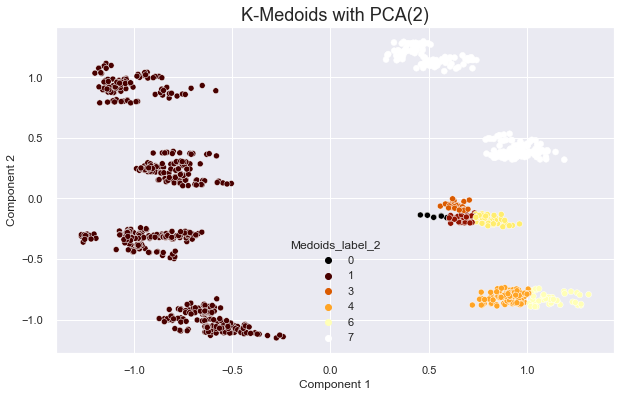

In [78]:
sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_concat, hue = 'Medoids_label_2',
                palette='afmhot')
plt.title('K-Medoids with PCA(2)', fontsize=18)

plt.show()

The silhouette score is much worse for this algorithm and also the split of the clusters is much worse.

In [76]:
Model_Comparison = pd.DataFrame({
'Model' : ['K-means_1', 'K-means_PCA(6)', 'K-means_PCA(2)', 'KMedoids', 'KMedoids_PCA(2)'],
'Silhouette_Score' : [silh_score_1, silh_score_2, silh_score_3, silh_score_4, silh_score_5],
'Inertia_Score' : [inertia_1, inertia_2, inertia_3, inertia_4, inertia_5]})

Model_Comparison_df = Model_Comparison.sort_values(by='Silhouette_Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Silhouette_Score,Inertia_Score
0,K-means_PCA(2),0.768221,18.874802
1,K-means_PCA(6),0.447977,660.142214
2,KMedoids_PCA(2),0.413379,483.517259
3,K-means_1,0.319815,1182.580135
4,KMedoids,0.171088,1420.406124


Text(0.5, 1.0, 'Model Comparison')

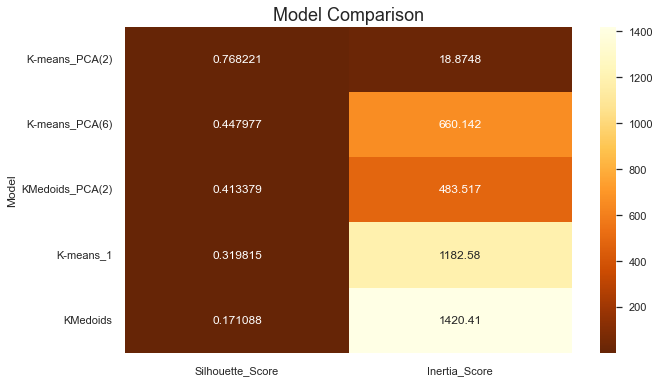

In [82]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True,fmt='g', cmap='YlOrBr_r')
plt.title('Model Comparison', fontsize=18)